# Exploración de modelos.

### Escalado

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# Splitting data
from sklearn.model_selection import train_test_split

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [43]:
df = pd.read_csv("/workspaces/Final_Project_DataScient/data/processed/data_final.csv")
df

,MARITAL,RENTHOM1,VETERAN3,EMPLOY1,_AGEG5YR,_INCOMG1,_EDUCAG,_CHLDCNT,HHADULT,SEXVAR,...,_DRDXAR2,_PHYS14D,_MENT14D,_BMI5CAT,DECIDE,DIFFALON,LSATISFY,EMTSUPRT,SDHISOLT,tobacco_use
0,0.0,0.0,0.0,0.0,8.0,4.0,3.0,0.0,2,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,6.0,8.0,-1.0,3.0,0.0,4,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,6.0,2.0,1.0,0.0,2,1.0,...,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,6.0,5.0,2.0,0.0,2,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,7.0,8.0,3.0,2.0,0.0,2,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114301,1.0,0.0,0.0,1.0,8.0,5.0,2.0,0.0,1,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0
114302,0.0,1.0,0.0,0.0,9.0,5.0,3.0,0.0,4,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
114303,0.0,0.0,1.0,0.0,6.0,4.0,3.0,1.0,2,1.0,...,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
114304,0.0,2.0,0.0,7.0,9.0,-1.0,1.0,0.0,1,1.0,...,0.0,2.0,2.0,0.0,-1.0,0.0,-1.0,0.0,1.0,2.0


In [44]:
columnas = df.columns
columnas

Index(['MARITAL', 'RENTHOM1', 'VETERAN3', 'EMPLOY1', '_AGEG5YR', '_INCOMG1',
       '_EDUCAG', '_CHLDCNT', 'HHADULT', 'SEXVAR', 'MEDCOST1', '_HLTHPLN',
       '_AIDTST4', 'SDHEMPLY', 'SDHFOOD1', 'SDHUTILS', 'SDHBILLS', 'SDHTRNSP',
       'SLEPTIM1', 'HIVRISK5', '_TOTINDA', '_RFBING6', 'CVDSTRK3', 'ADDEPEV3',
       'DIABETE4', 'COVIDPOS', 'COLNCNCR', '_MICHD', '_ASTHMS1', '_DRDXAR2',
       '_PHYS14D', '_MENT14D', '_BMI5CAT', 'DECIDE', 'DIFFALON', 'LSATISFY',
       'EMTSUPRT', 'SDHISOLT', 'tobacco_use'],
      dtype='object')

In [45]:
for col in columnas:
    df = df[df[col] != -1]

In [46]:
df.shape

(80072, 39)

In [ ]:
# MARITAL, RENTHOM1, EMPLOY1

In [48]:
for col in columnas:
    print(df[col].value_counts())

MARITAL
0.0    49469
1.0    13525
2.0     7268
4.0     6061
5.0     2224
3.0     1525
Name: count, dtype: int64
RENTHOM1
0.0    65242
1.0    13125
2.0     1705
Name: count, dtype: int64
VETERAN3
0.0    68559
1.0    11513
Name: count, dtype: int64
EMPLOY1
0.0    33914
6.0    27842
1.0     8292
7.0     5329
4.0     2215
2.0     1302
3.0     1025
5.0      153
Name: count, dtype: int64
_AGEG5YR
8.0     13344
9.0     12579
7.0     12185
6.0     11767
5.0     10556
10.0     9754
11.0     5923
12.0     3964
Name: count, dtype: int64
_INCOMG1
4.0    25537
5.0    19228
3.0     9503
2.0     7969
1.0     6761
6.0     6652
0.0     4422
Name: count, dtype: int64
_EDUCAG
3.0    37846
2.0    22152
1.0    16552
0.0     3522
Name: count, dtype: int64
_CHLDCNT
0.0    65416
1.0     7883
2.0     4659
3.0     1444
4.0      442
5.0      228
Name: count, dtype: int64
HHADULT
2     41690
1     20362
3     11514
4      4661
5      1288
6       340
7        96
8        44
10       16
9        15
12       12
13 

In [49]:
df

,MARITAL,RENTHOM1,VETERAN3,EMPLOY1,_AGEG5YR,_INCOMG1,_EDUCAG,_CHLDCNT,HHADULT,SEXVAR,...,_DRDXAR2,_PHYS14D,_MENT14D,_BMI5CAT,DECIDE,DIFFALON,LSATISFY,EMTSUPRT,SDHISOLT,tobacco_use
0,0.0,0.0,0.0,0.0,8.0,4.0,3.0,0.0,2,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,6.0,2.0,1.0,0.0,2,1.0,...,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,6.0,5.0,2.0,0.0,2,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,7.0,8.0,3.0,2.0,0.0,2,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0
5,1.0,1.0,0.0,6.0,11.0,1.0,2.0,0.0,2,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114300,1.0,0.0,0.0,1.0,11.0,5.0,3.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114301,1.0,0.0,0.0,1.0,8.0,5.0,2.0,0.0,1,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0
114302,0.0,1.0,0.0,0.0,9.0,5.0,3.0,0.0,4,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
114303,0.0,0.0,1.0,0.0,6.0,4.0,3.0,1.0,2,1.0,...,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
# pd.get_dummies()
df_coded = pd.get_dummies(df, columns=["MARITAL", "RENTHOM1", "EMPLOY1"])
df_coded.shape

(80072, 53)

In [56]:
# Splitting data into train and test sets
X = df_coded.drop("ADDEPEV3", axis = 1)
y = df_coded["ADDEPEV3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # stratify=y for imbalanced classes in the target


# Save my information in two .csv files for work from app.py
# Join X_train with y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Join X_test with y_test
test_data = pd.concat([X_test, y_test], axis=1)

# Save to CSV files
train_data.to_csv('../data/processed/train_data.csv', index=False)
test_data.to_csv('../data/processed/test_data.csv', index=False)

In [57]:
# Scaling
# Instantiate the scaler
scaler = MinMaxScaler().fit(X_train) #
# Transformation and conversion to dataframe of scaled data
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [58]:
X_train_scaled

,VETERAN3,_AGEG5YR,_INCOMG1,_EDUCAG,_CHLDCNT,HHADULT,SEXVAR,MEDCOST1,_HLTHPLN,_AIDTST4,...,RENTHOM1_1.0,RENTHOM1_2.0,EMPLOY1_0.0,EMPLOY1_1.0,EMPLOY1_2.0,EMPLOY1_3.0,EMPLOY1_4.0,EMPLOY1_5.0,EMPLOY1_6.0,EMPLOY1_7.0
41924,0.0,0.857143,0.500000,0.333333,0.0,0.111111,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31425,0.0,0.571429,0.666667,0.333333,0.0,0.111111,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
82437,0.0,0.428571,0.666667,1.000000,0.0,0.111111,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3328,0.0,0.142857,0.833333,0.333333,0.0,0.111111,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100799,0.0,0.000000,0.666667,0.666667,0.0,0.111111,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,0.0,0.285714,0.666667,0.666667,0.0,0.111111,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78799,0.0,0.428571,0.166667,0.333333,0.0,0.055556,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
109392,0.0,0.142857,0.666667,1.000000,0.0,0.111111,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1274,0.0,0.000000,1.000000,1.000000,0.4,0.111111,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# ML Models
model = LogisticRegression(random_state = 42)
# Training
model.fit(X_train_scaled, y_train)
# Predict
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

In [62]:
# Metrics
# Classification
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.834093037777084
F1 score Test:  0.49400114263949724
Precision Test:  0.6829910479199579
Recall Test:  0.3869331742243437
Accuracy Train:  0.8415629829682939
F1 score Train:  0.5076885762794082
Precision Train:  0.6932043979335011
Recall Train:  0.4005051278126435


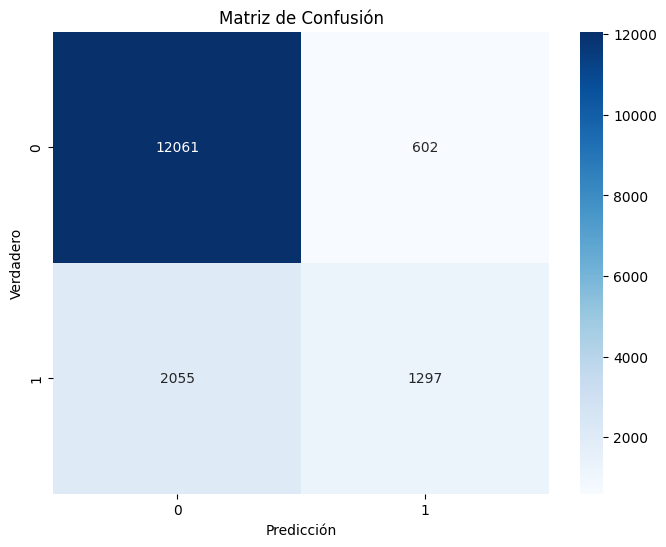

In [64]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Graph the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

In [66]:
# ML Models
model_rf = RandomForestClassifier(random_state = 42, class_weight='balanced')
# Training
model_rf.fit(X_train_scaled, y_train)
# Predict
y_pred_test = model_rf.predict(X_test_scaled)
y_pred_train = model_rf.predict(X_train_scaled)

In [67]:
# Metrics
# Classification
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.8304714330315329
F1 score Test:  0.4566740044026416
Precision Test:  0.6936170212765957
Recall Test:  0.34039379474940334
Accuracy Train:  0.9990633342179621
F1 score Train:  0.997706246654943
Precision Train:  0.996715551481821
Recall Train:  0.9986989132098576


In [68]:
from sklearn.svm import SVC

# Crear y entrenar el modelo SVM
model_svc = SVC(kernel='rbf', C=1.0)
model_svc.fit(X_train_scaled, y_train)

# Predecir
y_pred = model_svc.predict(X_test_scaled)
y_pred_train = model_svc.predict(X_train_scaled)
# Evaluar
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     12663
         1.0       0.74      0.32      0.44      3352

    accuracy                           0.83     16015
   macro avg       0.79      0.64      0.67     16015
weighted avg       0.82      0.83      0.81     16015

